In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_file(filename, hist=False):
    """
      Read csv file.
      if hist=True, images will be load in Image Histogram, a vector has 256 elements
    """
    df = pd.read_csv(filename)
    if hist:
        pixels = np.empty((df.shape[0], 256))
        for i in range(df.shape[0]):
            tmp = df.iloc[i].value_counts(sort=False).reindex(range(0, 256), fill_value=0).to_numpy()
            pixels[i] = tmp
    else:
        pixels = df.drop(columns=['label']).values

    labels = df.label.values
    pixels = pixels.astype(np.float64)
    return pixels, labels

In [3]:
# read data from csv file
X_train, y_train = read_file('sign_mnist_train.csv')
X_test, y_test = read_file('sign_mnist_test.csv')

# normalize data from 0 to 1 range 
X_train /= 255
X_test /= 255

In [4]:
# Add SIGMOID FUNCTION - the same as before
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [5]:
# Add costFunctionReg - the same as before
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m=len(y)
          
    h = sigmoid(np.dot(X,theta))
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    cost = sum(error)/m
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #np.dot way to compute dot product
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # alternative (basic) way to make the gradient column vector
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

In [6]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        # print("Iteration:", i, " Cost:", cost, "Shape of grad:", grad.shape)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [ ]:
def oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, K):
    """
    Inputs:
    numpy array of data X and labels y
    initial_theta - inicialized vector of model parameters theta 
    alpha - learning rate
    num_iters - number of iterations
    Lambda - regularization parameter 
    K -number of classes
    
    ONEVSALL trains K Logistic Regression classifiers using gradient descent. 
    
    Returns:
    all_theta - Kxn matrix where i-th row corresponds to the i-th classifier, n parameters
    all_J - the evolution of cost function during each iteration (J_history) for all K classifiers
    
    """
    m, n = X.shape[0], X.shape[1]
    #Inicialize the vector of outputs
    all_theta = []
    all_J=[]
    
    # add an extra column of 1´s corresponding to xo=1 (aka intercept term)
    X = np.append(np.ones((m,1)),X, axis=1)
    
    for i in range(1,K+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,alpha,num_iters,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
        
    return np.array(all_theta).reshape(K,n+1), all_J

In [8]:
# count unique classes in y_train
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)
n_class = len(unique_classes)
print("Number of unique classes:", n_class)

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of unique classes: 24


In [9]:
# update label 0 to be label 9
y_train = np.where(y_train==0,9,y_train)


In [10]:
# count unique classes in y_train
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)
n_class = len(unique_classes)
print("Number of unique classes:", n_class)

Unique classes in y_train: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of unique classes: 24


In [11]:
# reshape y_train to be a column vector
y_train = y_train.reshape((y_train.shape[0],1))


In [12]:
# count unique classes in y_train
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)
n_class = len(unique_classes)
print("Number of unique classes:", n_class)

Unique classes in y_train: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of unique classes: 24


In [13]:
m, n = X_train.shape[0], X_train.shape[1]
# m -> number of training examples
# n -> number of features (28*28=784 for images)
initial_theta = np.zeros((n+1,1))
# num_iters=300
num_iters=5_000
alpha=0.01 #learning rate
Lambda=5.0
all_theta, all_J = oneVsAll(X_train, y_train, initial_theta, alpha, num_iters, Lambda, n_class)
print(all_theta.shape)

KeyboardInterrupt: 

<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
/var/folders/f9/3b8bs8990d5d7sc9_h19dpb80000gn/T/ipykernel_60361/369793352.py:4: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

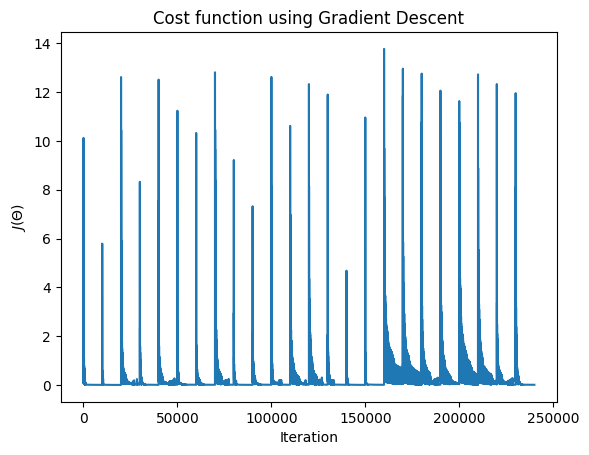

In [ ]:
#plt.plot(all_J[0:300]) #1st classifier
plt.plot(all_J)  #All classifiers
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.append(np.ones((m,1)),X, axis=1)
    
    #predictions = X @ all_theta.T # predictions.shape =(5000,10)
    predictions = np.dot (X, all_theta.T) # predictions.shape =(5000,10)
    #np.argmax returns indices of the max element of the array in a particular axis.
    #+1 in order to label 0 as 10. 
    return np.argmax(predictions,axis=1)+1

In [ ]:
pred = predictOneVsAll(all_theta, X_train)
print(pred.shape)

(27455,)


In [ ]:
#print(pred.shape)  # = (5000,)
pred=pred.reshape(m,1)

#np.newaxis because the second dimension is not explicitly defined in pred
#print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

print("Training Set Accuracy:",sum(pred==y_train)[0]/m*100,"%")

Training Set Accuracy: 93.8371881260244 %


In [ ]:
pred = predictOneVsAll(all_theta, X_test)
print(pred.shape)

#print(pred.shape)  # = (5000,)
m = X_test.shape[0]
pred=pred.reshape(m,1)

#np.newaxis because the second dimension is not explicitly defined in pred
#print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

y_test = np.where(y_test==0,9,y_test)
y_test = y_test.reshape((y_test.shape[0],1))

print("Training Set Accuracy:",sum(pred==y_test)[0]/m*100,"%")

(7172,)
Training Set Accuracy: 64.58449525934189 %


In [ ]:
''' 
    What we observe is that the accuracy on the test set is lower than the accuracy on the training set.
    This is a common occurrence in machine learning and is often referred to as overfitting. 
    Overfitting happens when a model learns the training data too well, including its noise and outliers, 
    which can lead to poor generalization to new, unseen data. In this case, the model may have learned patterns 
    specific to the training set that do not apply to the test set, resulting in lower accuracy. To mitigate overfitting, 
    techniques such as cross-validation, regularization, or using a simpler model can be employed. 
    Logistic Regression in this case seems to have overfitted the training data to some extent, 
    so its not a good generalizer to new data.
 '''